### Linear Regression

$$ y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} $$
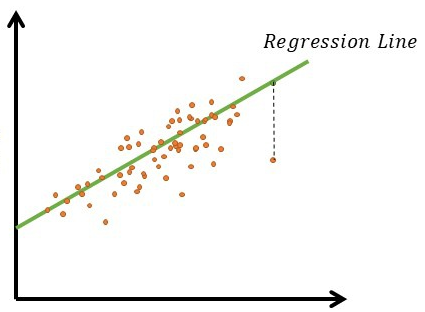

### Logistic Regression

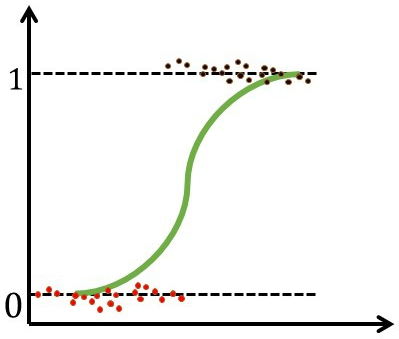

$$ P = \frac{1}{1 + e^{-(b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n})}} $$

(where e is the base of the natural logarithm)

Load the required packages, and import the `clothing_sales_training` and `clothing_sales_test` data sets as `sales_train` and `sales_test`, respectively.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix

sales_train = pd.read_csv("/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/clothing_sales_training.csv")
sales_test = pd.read_csv("/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/clothing_sales_test.csv")

Separate the variables into predictor variables X and response variable y. Add a constant to the X data frame in order to include a constant term in our regression model.

In [2]:
X = pd.DataFrame(sales_train[['Days', 'Web']])
X = sm.add_constant(X)
y = pd.DataFrame(sales_train[['CC']])

To perform logistic regression, use the `Logit()` and `fit()` commands. Save the model output and run the `summary2()` command on the saved model output to
view the model results.

In [3]:
logreg01 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.655955
         Iterations 5


In [4]:
logreg01.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.053     
Dependent Variable: CC               AIC:              1909.5825 
Date:               2021-06-14 10:37 BIC:              1925.4226 
No. Observations:   1451             Log-Likelihood:   -951.79   
Df Model:           2                LL-Null:          -1004.9   
Df Residuals:       1448             LLR p-value:      8.3668e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.4962     0.0887    5.5968   0.0000    0.3224    0.6699
Days      -0.0037     0.0004   -8.4491   0.0000   -0.0046   -0.0028
Web        1.2537     0.3307    3.7914   0.0001    0.6056    1.9018
=================================================================

"""

To validate the model, perform the same steps on the test data set.

In [5]:
X_test = pd.DataFrame(sales_test[['Days', 'Web']])
X_test = sm.add_constant(X_test)
y_test = pd.DataFrame(sales_test[['CC']])

We can look at the performance metrics using `confusion_matrix`. But first, we need to make predictions using the model: the outputs given back by the model are probabilities of the instance being the positive class. **If probability > 0.5, the instance is considered the positive class**.

In [6]:
predictions_prob = logreg01.predict(X_test)

In [7]:
predictions_prob.head()

0    0.463090
1    0.542853
2    0.578054
3    0.556706
4    0.382003
dtype: float64

In [8]:
predictions = (logreg01.predict(X_test) > 0.5).astype(int)

In [9]:
predictions.head()

0    0
1    1
2    1
3    1
4    0
dtype: int64

In [10]:
confusion_matrix(y_test, predictions)

array([[405, 312],
       [215, 463]])

### Poisson Regression

Here, we run Poisson regression using the `GLM()` command on the same problem as above.

In [11]:
poisreg01 = sm.GLM(y, X, family = sm.families.Poisson()).fit()

Use the `summary()` command to view the results of the model.

In [12]:
poisreg01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     CC   No. Observations:                 1451
Model:                            GLM   Df Residuals:                     1448
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1183.1
Date:                Mon, 14 Jun 2021   Deviance:                       964.28
Time:                        10:37:41   Pearson chi2:                     773.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4301      0.061     -7.077      0.000      -0.549      -0.311
Days          -0.0021      0.000     -6.264      0.000      -0.003      -0.001
Web            0.3803      0.152      2.497      0.013       0.082       0.679
==============================================================================
"""

In [13]:
predictions2 = (poisreg01.predict(X_test) > 0.5).astype(int)

In [14]:
predictions2.head()

0    0
1    1
2    1
3    1
4    0
dtype: int64

When using **Poisson Regression** on a **binary** classification problem, the result should be relatively the same as using **Logistic Regression**

In [15]:
confusion_matrix(y_test, predictions2)

array([[429, 288],
       [231, 447]])

### Neural Network

In [16]:
# !pip install --user tensorflow==1.15 keras==2.2.4

In [17]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Let's load the `clothing_sales_training` dataset again

In [18]:
sales_train = pd.read_csv("/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/clothing_sales_training.csv")

Separate the variables into predictor variables X and response variable y.

In [19]:
X = pd.DataFrame(sales_train[['Days', 'Web']])
y = pd.DataFrame(sales_train[['CC']])

In [20]:
X.head()

,Days,Web
0,333.0,0
1,171.5,0
2,213.0,0
3,71.4,1
4,145.0,0


Before feeding into Neural Network, variables have to be normalized to 0-1 range using Min/Max scaler

$$ Normalization = \frac{x-min}{max-min}$$

In [21]:
days_normalized = (X['Days'] - X['Days'].min()) / (X['Days'].max() - X['Days'].min())

In [22]:
days_normalized.head(10)

0    0.472023
1    0.240316
2    0.299857
3    0.096700
4    0.202296
5    0.635581
6    0.163558
7    0.100143
8    0.390244
9    0.091463
Name: Days, dtype: float64

Convert variables into 1-dimensional numpy array before feeding into Neural Network

In [23]:
print(type(days_normalized))
print(type(X['Web']))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
# input variables
days_1d = np.array(days_normalized).reshape(-1, 1)
web_1d = np.array(X['Web']).reshape(-1, 1)

# outcome variable
y_1d = np.array(y).reshape(-1, 1)

Redefine our input features and outcome variable 

In [25]:
X = np.concatenate((days_1d,
                    web_1d),
                  axis=1)
y = y_1d

* The first hidden layer has 16 nodes and uses the ReLU activation function
* The output layer has one node and uses the sigmoid activation function

In [26]:
# define the neural network architecture
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Now we fit the Neural Network model on the dataset

* epoch: number of passes of the entire training dataset the machine learning algorithm has completed
* batch_size: number of training examples utilized in one iteration (in power of 2)

In [27]:
model.fit(X, y, epochs=30, batch_size=32)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





1451/1451 [==============================] - 0s 191us/step - loss: 0.6868 - acc: 0.5382
Epoch 2/30
1451/1451 [==============================] - 0s 39us/step - loss: 0.6862 - acc: 0.5376
Epoch 3/30
1451/1451 [==============================] - 0s 44us/step - loss: 0.6856 - acc: 0.5389
Epoch 4/30
1451/1451 [==============================] - 0s 45us/step - loss: 0.6848 - acc: 0.5410
Epoch 5/30
1451/1451 [==============================] - 0s 46us/step - loss: 0.6834 - acc: 0.5513
Epoch 6/30
1451/1451 [==============================] - 0s 42us/step - loss: 0.6816 - acc: 0.5610
Epoch 7/30
1451/1451 [==============================] - 0s 44us/step - loss: 0.6798 - acc: 0.5982
Epoch 8/30
1451/1451 [==============================] - 0s 46us/step - loss: 0.6780 - acc: 0.6258
Epoch 9/30
1451/1451 [==============================] - 0s 42us/step - loss: 0.6764 - acc: 0.6520
Epoch 10/30


Use the trained Neural Network to make predictions

In [28]:
predictions = (model.predict(X) > 0.5).astype(int)

In [29]:
confusion_matrix(y, predictions)

array([[513, 237],
       [266, 435]])